# Adjusted Carbon Offset by Population  

This plot shows the potential adjusted carbon offset by a states' population. Unlike the comparison to state landmass, there should be a correlation between the carbon offset and population as more people means more elctricity used.  
  
The potential adjusted carbon offset data comes from adjusted data provided by Google's Project Sunroof and state populations are estimated from the 2010 Census by the Census department (via wikipedia). 

In [5]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
#Import adjusted carbon offset data from csv.
adjusted_carbon_offset_working_df = pd.read_csv('../Resources/OtherData/adjusted_carbon_offset.csv')
adjusted_carbon_offset_working_df = adjusted_carbon_offset_working_df.reindex(columns= ['state', 'adjusted_carbon_offset_metric_tons'])
adjusted_carbon_offset_df = adjusted_carbon_offset_working_df.rename(columns = {'adjusted_carbon_offset_metric_tons': 'carbon_offset'})
adjusted_carbon_offset_df.head()

,state,carbon_offset
0,Alabama,1.055440e+07
1,Alaska,3.199207e+05
2,Arizona,1.513840e+07
3,Arkansas,5.142536e+06
4,California,3.589850e+07


In [16]:
#Import state population data from csv.
state_pop_working_df = pd.read_csv('../Resources/OtherData/state-population.csv')
state_pop_working_df = state_pop_working_df.reindex(columns = ['State', 'Abbreviation', 'Population estimate, July 1, 2018'])
state_pop_df = state_pop_working_df.rename(columns = {'State': 'state', 'Abbreviation': 'abbrv', 'Population estimate, July 1, 2018': 'pop_est'})
state_pop_df.head()

,state,abbrv,pop_est
0,Alabama,AL,4887871
1,Alaska,AK,737438
2,Arizona,AZ,7171646
3,Arkansas,AR,3013825
4,California,CA,39557045


In [18]:
#Join the dataframes to calculate needed information.
carbon_offset_by_pop_est_working_df = adjusted_carbon_offset_df.join(state_pop_df.set_index('state'), on ='state')
carbon_offset_by_pop_est_df = carbon_offset_by_pop_est_working_df.reindex(columns = ['state', 'abbrv', 'pop_est', 'carbon_offset'])
carbon_offset_by_pop_est_df.head()

,state,abbrv,pop_est,carbon_offset
0,Alabama,AL,4887871,1.055440e+07
1,Alaska,AK,737438,3.199207e+05
2,Arizona,AZ,7171646,1.513840e+07
3,Arkansas,AR,3013825,5.142536e+06
4,California,CA,39557045,3.589850e+07


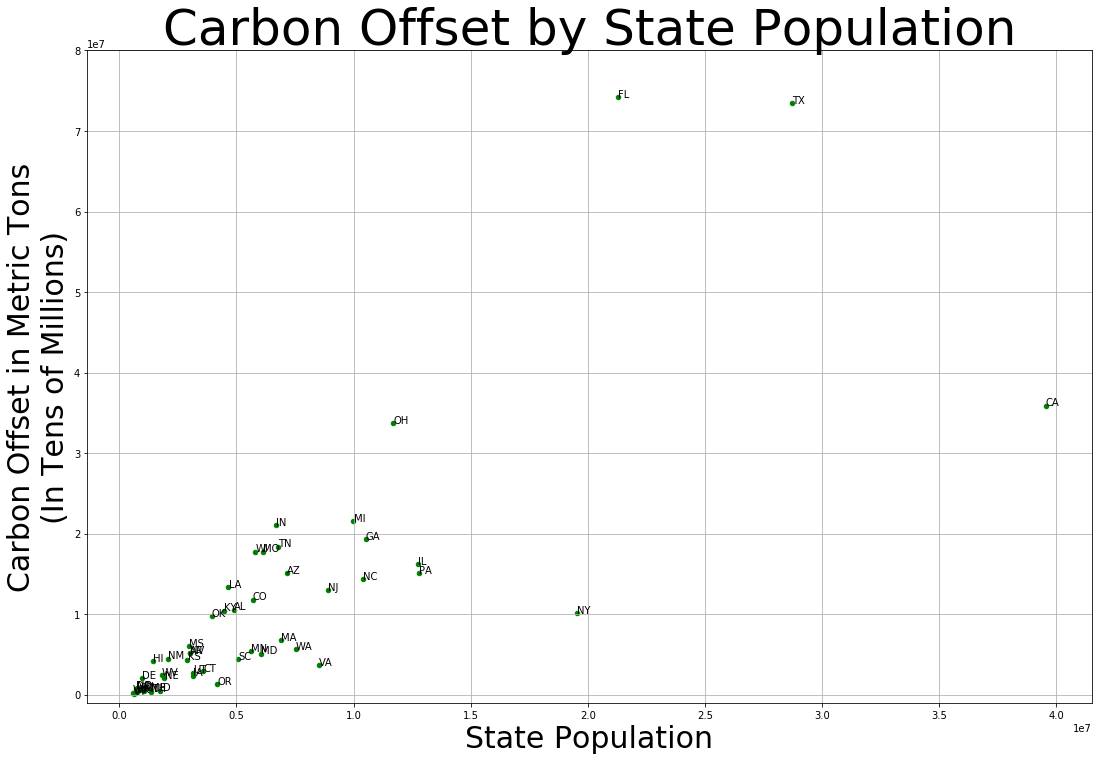

In [22]:
#Scatter Plot of Adjusted Carbon Offset by State Population, and save as a png file.

#Plot the data
carbon_offset_by_pop_est_df.plot.scatter(x='pop_est', y="carbon_offset", figsize = (18,12), color='green')

#titles
plt.title('Carbon Offset by State Population', fontsize = 50)
plt.xlabel('State Population', fontsize = 30)
plt.ylabel('Carbon Offset in Metric Tons'
          '\n'
          '(In Tens of Millions)', fontsize = 30)

#Grid & axis Values
plt.grid(True)
plt.ylim(-1000000, 80000000)

#Annotation of Dots
xaxis = np.array(carbon_offset_by_pop_est_df['pop_est'])
yaxis = np.array(carbon_offset_by_pop_est_df['carbon_offset'])
variable_label = np.array(carbon_offset_by_pop_est_df.abbrv)
for i, txt in enumerate(variable_label):
    plt.annotate(txt, (xaxis[i]+3000, yaxis[i]+1000))